In [89]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import xarray as xr
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools, places
import gsw 
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import math
from scipy import io
import pickle
import cmocean
from salishsea_tools import Keegan_eval_tools as ket
import json
from collections import OrderedDict
from matplotlib.colors import LogNorm
import arrow
import glob
import datetime
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib.dates import HourLocator, MonthLocator, YearLocator

fs=12
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

import warnings
#warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

%matplotlib inline

### Group variables into PreMHW (2007-2013), MHW (2014-2019), and PostMHW (2020-2022) years

### Nitrate

In [90]:
JdFModel_PreMHW_Nitrate=[25.46595238, 25.10645266, 23.88333333, 21.13792517, 23.55447354,
       22.02516667, 25.47173512]

In [91]:
JdFModel_MHW_Nitrate=[21.21370238, 20.32948413, 19.08925489, 20.09481645, 24.28910431,
       21.82869048]

In [92]:
JdFModel_PostMHW_Nitrate=[23.61517857, 26.12128912, 22.5810119]

In [93]:
JdFObs_PreMHW_Nitrate=[25.52466667, 25.31934524, 23.99986111, 21.30912698, 24.689     ,
       23.31589286, 26.2621875 ]

In [94]:
JdFObs_MHW_Nitrate= [22.23803175, 21.52001984, 19.84737564, 22.28666058, 24.74965741,
       21.9103    ]

In [95]:
JdFObs_PostMHW_Nitrate= [23.96016667, 26.14173016, 22.54800694]

In [96]:
CSOGModel_PreMHW_Nitrate= [13.76204053, 13.42169187, 14.10018633, 13.6326065 , 13.67795222,
       13.86459122, 12.77839329]

In [97]:
CSOGModel_MHW_Nitrate= [12.37597738, 12.58978486, 12.80705029, 12.08678382, 11.3973794 ,
       11.93967208]

In [98]:
CSOGModel_PostMHW_Nitrate= [11.85386634, 12.69919   , 11.98668728]

In [99]:
CSOGObs_PreMHW_Nitrate= [16.35      , 11.35511905, 13.458125  , 14.23793891, 15.67034864,
       11.5400463 , 12.89444444]

In [100]:
CSOGObs_MHW_Nitrate= [14.41755556, 10.18229167, 13.49349537, 13.46175   , 12.28763889,
       11.8059375]

In [101]:
CSOGObs_PostMHW_Nitrate= [11.06472222, 12.11614583, 11.9875  ]

### Chlorophyll a

In [102]:
JdFModel_PreMHW_Chl= [1.49272673, 1.47326203, 1.53346601, 1.40846808, 1.37089886,
       1.34041516, 1.44007006 ]

In [103]:
JdFModel_MHW_Chl= [1.46866229, 1.50353402, 1.47376028, 1.46781159, 1.54241675,
       1.52717395]

In [104]:
JdFModel_PostMHW_Chl= [1.42478996, 1.50854268, 1.33042495]

In [105]:
JdFObs_PreMHW_Chl= [1.05763333, 2.95191667, 1.77166667, 1.38727679, 1.24403333,
       1.82116071, 1.60875  ]

In [106]:
JdFObs_MHW_Chl= [2.17050926, 3.2027381 , 2.83861111, 2.33544444, 2.39046296,
       2.09311667]

In [107]:
JdFObs_PostMHW_Chl= [3.2814881 , 2.18646429, 2.58866786]

In [108]:
CSOGModel_PreMHW_Chl= [1.06069728, 1.09956617, 1.16708021, 1.1114897 , 1.04451661,
       1.0681608 , 1.06370508]

In [109]:
CSOGModel_MHW_Chl= [1.0724103 , 1.11275868, 1.08473561]

In [110]:
CSOGModel_PostMHW_Chl= [1.04620548, 1.08307177, 1.00029567]

In [111]:
CSOGObs_PreMHW_Chl= [2.53354167, 2.86621429, 3.6246875 , 1.58575617, 2.94511111,
       3.6425    , 3.04208333 ]

In [112]:
CSOGObs_MHW_Chl= [4.7706    , 2.50791667, 2.48555556, 2.742     , 2.19388889,
       3.04927083]

In [113]:
CSOGObs_PostMHW_Chl= [2.89888889, 1.963     , 1.35333333]

### Zooplankton

In [114]:
JdFModel_PreMHW_Zoop= [40.97091736, 34.56179485, 40.79210639, 40.24842111, 39.36929701,
       39.43969444, 41.0018098]

In [115]:
JdFModel_MHW_Zoop= [42.15289319, 41.80734561, 42.14018996, 41.418674  , 42.78587486,
       42.05309582]

In [116]:
JdFModel_PostMHW_Zoop= [40.93888406, 41.57672683, 40.11828113]

In [117]:
JdFObs_PreMHW_Zoop= [73.302102  , 14.74111463,  2.3833188 , 14.87558325]

In [118]:
JdFObs_MHW_Zoop= [  6.2645715 ,  71.65919419,  51.11017721,  93.3880311 ,
        47.64432025, 142.499052 ]

In [119]:
JdFObs_PostMHW_Zoop= [76.3078365 , 29.83299375, 99.25595381]

In [120]:
CSOGModel_PreMHW_Zoop= [26.95080662, 25.35863538, 28.28774411, 27.01760978, 26.10564125,
       26.83739426, 26.61693143]

In [121]:
CSOGModel_MHW_Zoop= [26.22532748, 26.63583795, 26.72609167, 26.40577134, 27.00728057,
       27.92284535]

In [122]:
CSOGModel_PostMHW_Zoop= [26.34864296, 27.02414087, 26.88032653]

In [123]:
CSOGObs_PreMHW_Zoop= [  9.83815307, 35.31997053, 24.39354978, 51.41443316, 23.71869   ,
       16.62680666, 23.26141963]

In [124]:
CSOGObs_MHW_Zoop= [ 6.37738342, 24.39739379, 20.6331443 , 18.95776277, 20.53130465,
       29.09171412]

In [125]:
CSOGObs_PostMHW_Zoop= [26.53605289, 16.31841475, 15.77146165]

### Statistical Analysis

In [126]:
from scipy.stats import f_oneway

#### Juan de Fuca Model

In [127]:
F, p =f_oneway(JdFModel_PreMHW_Nitrate,JdFModel_MHW_Nitrate,JdFModel_PostMHW_Nitrate)

In [128]:
# Number of groups
k = 3

# Total number of observations
N = len(JdFModel_PreMHW_Nitrate) + len(JdFModel_MHW_Nitrate) + len(JdFModel_PostMHW_Nitrate)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 13) = 4.59, p = 0.0310


In [129]:
F,p=f_oneway(JdFModel_PreMHW_Chl,JdFModel_MHW_Chl,JdFModel_PostMHW_Chl)

In [130]:
# Number of groups
k = 3

# Total number of observations
N = len(JdFModel_PreMHW_Chl) + len(JdFModel_MHW_Chl) + len(JdFModel_PostMHW_Chl)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 13) = 2.15, p = 0.1559


In [131]:
F,p=f_oneway(JdFModel_PreMHW_Zoop,JdFModel_MHW_Zoop,JdFModel_PostMHW_Zoop)

In [132]:
# Number of groups
k = 3

# Total number of observations
N = len(JdFModel_PreMHW_Zoop) + len(JdFModel_MHW_Zoop) + len(JdFModel_PostMHW_Zoop)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 13) = 4.23, p = 0.0386


#### Juan de Fuca Observations

In [133]:
F,p=f_oneway(JdFObs_PreMHW_Nitrate,JdFObs_MHW_Nitrate,JdFObs_PostMHW_Nitrate)

In [134]:
# Number of groups
k = 3

# Total number of observations
N = len(JdFObs_PreMHW_Nitrate) + len(JdFObs_MHW_Nitrate) + len(JdFObs_PostMHW_Nitrate)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 13) = 3.36, p = 0.0664


In [135]:
F,p=f_oneway(JdFObs_PreMHW_Chl,JdFObs_MHW_Chl,JdFObs_PostMHW_Chl)

In [136]:
# Number of groups
k = 3

# Total number of observations
N = len(JdFObs_PreMHW_Chl) + len(JdFObs_MHW_Chl) + len(JdFObs_PostMHW_Chl)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 13) = 5.18, p = 0.0221


In [137]:
F,p=f_oneway(JdFObs_PreMHW_Zoop,JdFObs_MHW_Zoop,JdFObs_PostMHW_Zoop)

In [138]:
# Number of groups
k = 3

# Total number of observations
N = len(JdFObs_PreMHW_Zoop) + len(JdFObs_MHW_Zoop) + len(JdFObs_PostMHW_Zoop)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 10) = 1.53, p = 0.2640


#### Central Strait of Georgia Model

In [139]:
F,p=f_oneway(CSOGModel_PreMHW_Nitrate,CSOGModel_MHW_Nitrate,CSOGModel_PostMHW_Nitrate)

In [140]:
# Number of groups
k = 3

# Total number of observations
N = len(CSOGModel_PreMHW_Nitrate) + len(CSOGModel_MHW_Nitrate) + len(CSOGModel_PostMHW_Nitrate)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 13) = 18.57, p = 0.0002


In [141]:
F,p=f_oneway(CSOGModel_PreMHW_Chl,CSOGModel_MHW_Chl,CSOGModel_PostMHW_Chl)

In [142]:
# Number of groups
k = 3

# Total number of observations
N = len(CSOGModel_PreMHW_Chl) + len(CSOGModel_MHW_Chl) + len(CSOGModel_PostMHW_Chl)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 10) = 1.60, p = 0.2498


In [143]:
F,p=f_oneway(CSOGModel_PreMHW_Zoop,CSOGModel_MHW_Zoop,CSOGModel_PostMHW_Zoop)

In [144]:
# Number of groups
k = 3

# Total number of observations
N = len(CSOGModel_PreMHW_Zoop) + len(CSOGModel_MHW_Zoop) + len(CSOGModel_PostMHW_Zoop)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 13) = 0.02, p = 0.9787


#### Central Strait of Georgia Observations

In [145]:
F,p=f_oneway(CSOGObs_PreMHW_Nitrate,CSOGObs_MHW_Nitrate,CSOGObs_PostMHW_Nitrate)

In [146]:
# Number of groups
k = 3

# Total number of observations
N = len(CSOGObs_PreMHW_Nitrate) + len(CSOGObs_MHW_Nitrate) + len(CSOGObs_PostMHW_Nitrate)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 13) = 1.63, p = 0.2341


In [147]:
F,p=f_oneway(CSOGObs_PreMHW_Chl,CSOGObs_MHW_Chl,CSOGObs_PostMHW_Chl)

In [148]:
# Number of groups
k = 3

# Total number of observations
N = len(CSOGObs_PreMHW_Chl) + len(CSOGObs_MHW_Chl) + len(CSOGObs_PostMHW_Chl)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 13) = 1.36, p = 0.2919


In [149]:
F,p=f_oneway(CSOGObs_PreMHW_Zoop,CSOGObs_MHW_Zoop,CSOGObs_PostMHW_Zoop)

In [150]:
# Number of groups
k = 3

# Total number of observations
N = len(CSOGObs_PreMHW_Zoop) + len(CSOGObs_MHW_Zoop) + len(CSOGObs_PostMHW_Zoop)

# Degrees of freedom
df_between = k - 1
df_within = N - k

# Print formatted ANOVA result
print(f"F({df_between}, {df_within}) = {F:.2f}, p = {p:.4f}")

F(2, 13) = 0.75, p = 0.4927


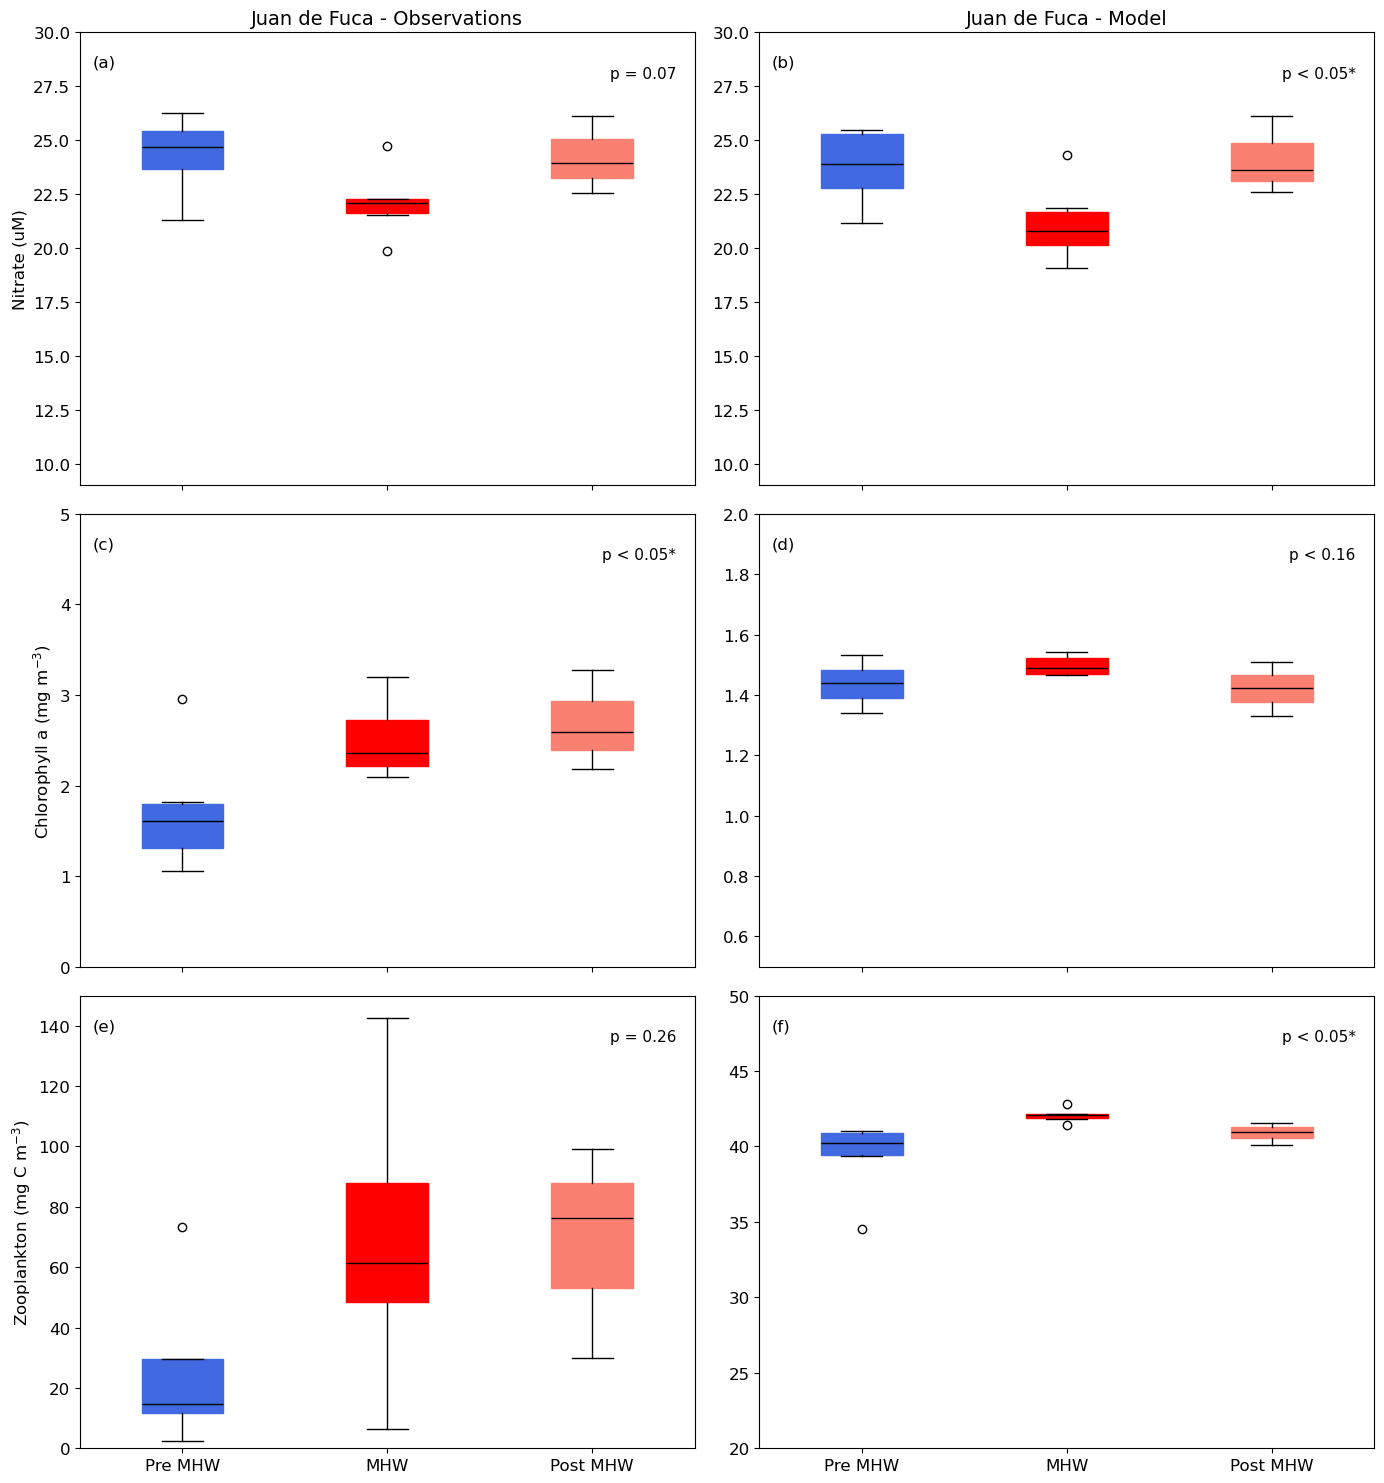

In [151]:
import string

stats_JdF = [
    'p = 0.07', 'p < 0.05*',
    'p < 0.05*', 'p < 0.16',
    'p = 0.26', 'p < 0.05*'
]


def color_boxplot(data_list, colors, positions, ax):
    for data, color, pos in zip(data_list, colors, positions):
        bp = ax.boxplot([data], patch_artist=True, showmeans=False, positions=[pos], widths=0.4)
        plt.setp(bp['boxes'], color=color, facecolor=color)
        for item in ['whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp[item], color='k')

def plot_region(region_name, parameter_data, custom_texts=None):
    colors = ['royalblue', 'r', 'salmon']
    positions = [1, 2, 3]
    labels = ['Pre MHW', 'MHW', 'Post MHW']
    subplot_labels = [f'({letter})' for letter in string.ascii_lowercase[:6]]

    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 15), sharex='col')
    axs = axs.flatten()

    for i, (param_name, obs_data, model_data, obs_y_limits, mod_y_limits) in enumerate(parameter_data):
        # Observations subplot
        ax_obs = axs[i * 2]
        color_boxplot(obs_data, colors, positions, ax_obs)
        ax_obs.set_ylabel(param_name, fontsize=12)
        ax_obs.set_ylim(obs_y_limits)
        ax_obs.set_xticks(positions)
        ax_obs.set_xticklabels(labels)
        if i == 0:
            ax_obs.set_title(f'{region_name} - Observations', fontsize=14)
        ax_obs.text(0.02, 0.95, subplot_labels[i * 2], transform=ax_obs.transAxes, fontsize=12, va='top')

        # Optional annotation for observations
        if custom_texts:
            ax_obs.text(0.97, 0.9, custom_texts[i * 2], transform=ax_obs.transAxes, fontsize=11, ha='right')

        # Model subplot
        ax_mod = axs[i * 2 + 1]
        color_boxplot(model_data, colors, positions, ax_mod)
        ax_mod.set_ylim(mod_y_limits)
        ax_mod.set_xticks(positions)
        ax_mod.set_xticklabels(labels)
        if i == 0:
            ax_mod.set_title(f'{region_name} - Model', fontsize=14)
        ax_mod.text(0.02, 0.95, subplot_labels[i * 2 + 1], transform=ax_mod.transAxes, fontsize=12, va='top')

        # Optional annotation for model
        if custom_texts:
            ax_mod.text(0.97, 0.9, custom_texts[i * 2 + 1], transform=ax_mod.transAxes, fontsize=11, ha='right')

    plt.savefig('Figure12_JdFModelvsObs_MHW.png', bbox_inches='tight', dpi=1000, transparent=False)
    plt.tight_layout()
    plt.show()

# Define your observed and modeled data here (as lists of values)

JdF_parameters = [
    (
        'Nitrate (uM)',
        [JdFObs_PreMHW_Nitrate, JdFObs_MHW_Nitrate, JdFObs_PostMHW_Nitrate],
        [JdFModel_PreMHW_Nitrate, JdFModel_MHW_Nitrate, JdFModel_PostMHW_Nitrate],
        (9, 30),       # y-limits for observations
        (9, 30)        # y-limits for model
    ),
    (
        'Chlorophyll a (mg m$^{-3}$)',
        [JdFObs_PreMHW_Chl, JdFObs_MHW_Chl, JdFObs_PostMHW_Chl],
        [JdFModel_PreMHW_Chl, JdFModel_MHW_Chl, JdFModel_PostMHW_Chl],
        (0, 5),        # y-limits for observations
        (.5, 2)         # y-limits for model
    ),
    (
        'Zooplankton (mg C m$^{-3}$)',
        [JdFObs_PreMHW_Zoop, JdFObs_MHW_Zoop, JdFObs_PostMHW_Zoop],
        [JdFModel_PreMHW_Zoop, JdFModel_MHW_Zoop, JdFModel_PostMHW_Zoop],
        (0, 150),      # y-limits for observations
        (20, 50)        # y-limits for model
    )
]

# Generate the plot
plot_region('Juan de Fuca', JdF_parameters, custom_texts=stats_JdF)

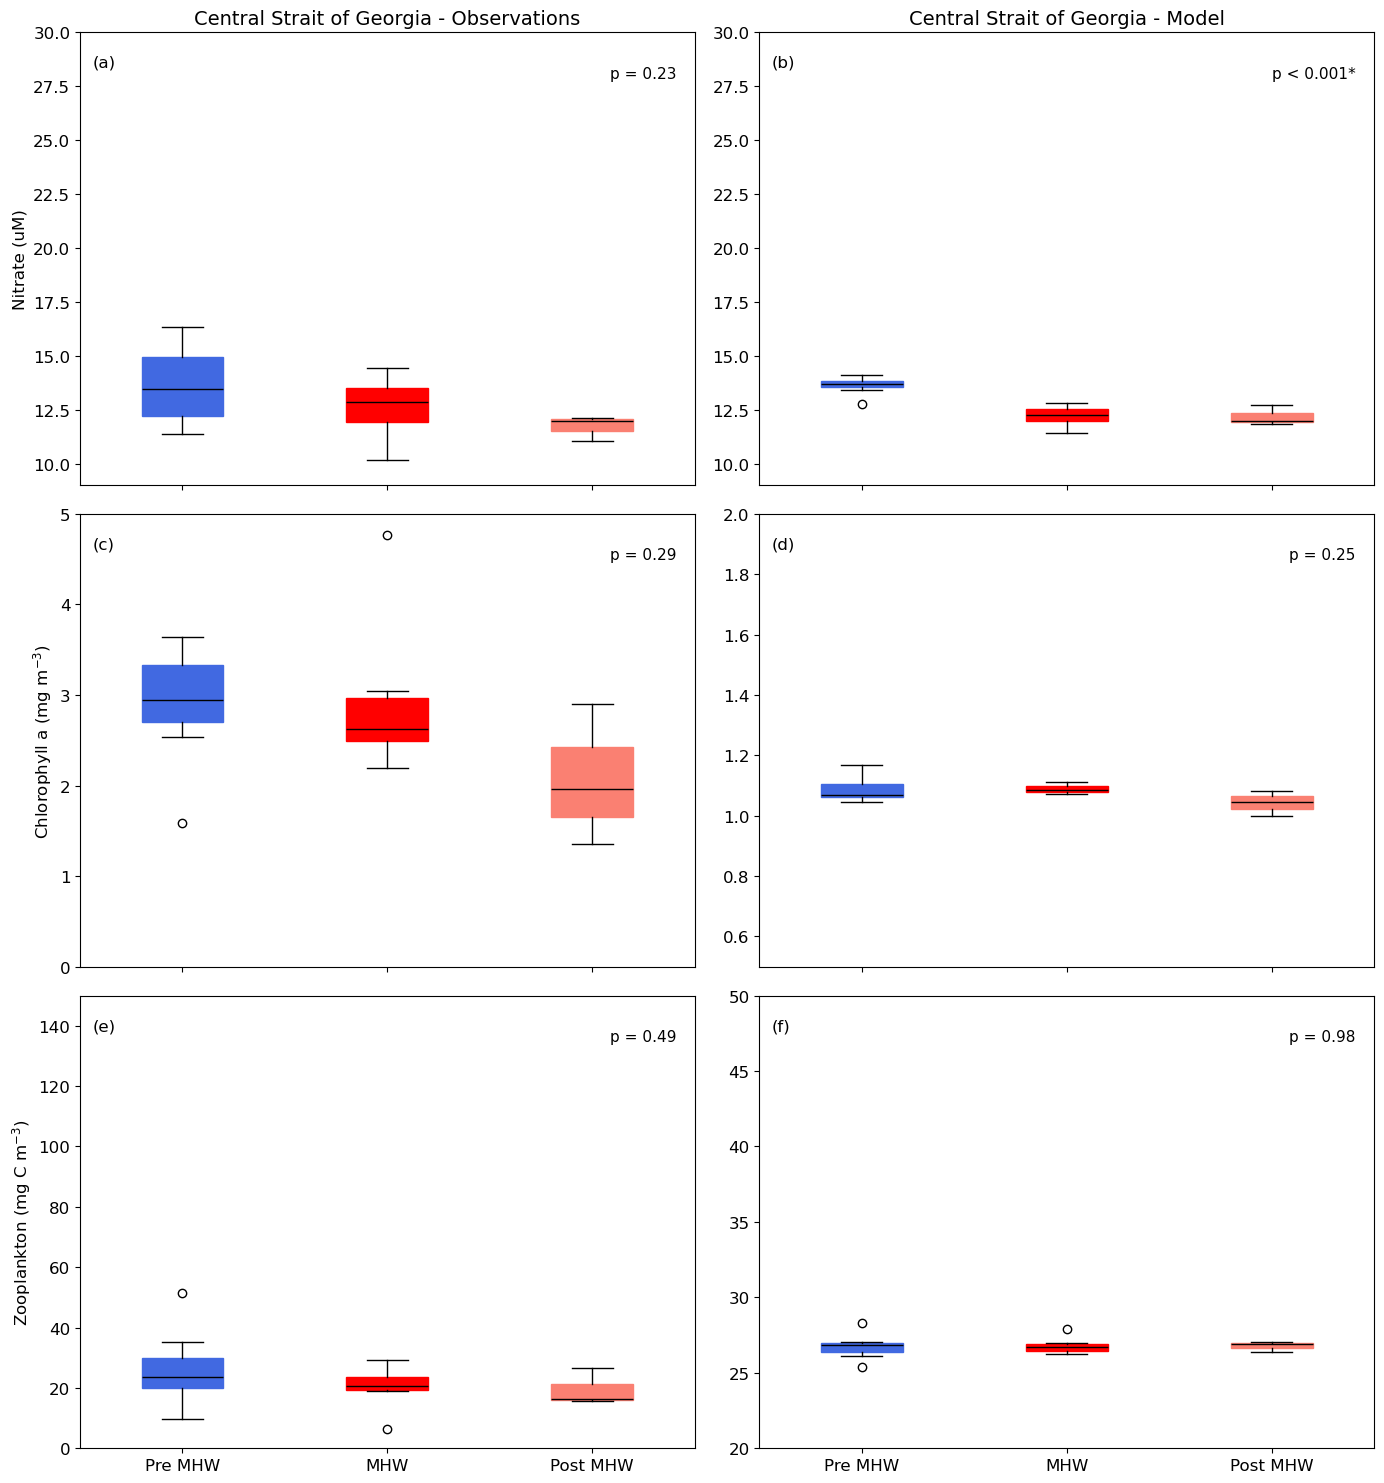

In [152]:
import string
import matplotlib.pyplot as plt
import string

# Optional custom annotation texts for each subplot
stats_CSOG = [
    'p = 0.23', 'p < 0.001*',
    'p = 0.29', 'p = 0.25',
    'p = 0.49', 'p = 0.98'
]

def color_boxplot(data_list, colors, positions, ax):
    for data, color, pos in zip(data_list, colors, positions):
        bp = ax.boxplot([data], patch_artist=True, showmeans=False, positions=[pos], widths=0.4)
        plt.setp(bp['boxes'], color=color, facecolor=color)
        for item in ['whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp[item], color='k')

def plot_region(region_name, parameter_data, custom_texts=None):
    colors = ['royalblue', 'r', 'salmon']
    positions = [1, 2, 3]
    labels = ['Pre MHW', 'MHW', 'Post MHW']
    subplot_labels = [f'({letter})' for letter in string.ascii_lowercase[:6]]

    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 15), sharex='col')
    axs = axs.flatten()

    for i, (param_name, obs_data, model_data, obs_y_limits, mod_y_limits) in enumerate(parameter_data):
        # Observations subplot
        ax_obs = axs[i * 2]
        color_boxplot(obs_data, colors, positions, ax_obs)
        ax_obs.set_ylabel(param_name, fontsize=12)
        ax_obs.set_ylim(obs_y_limits)
        ax_obs.set_xticks(positions)
        ax_obs.set_xticklabels(labels)
        if i == 0:
            ax_obs.set_title(f'{region_name} - Observations', fontsize=14)
        ax_obs.text(0.02, 0.95, subplot_labels[i * 2], transform=ax_obs.transAxes, fontsize=12, va='top')

        # Optional annotation for observations
        if custom_texts:
            ax_obs.text(0.97, 0.9, custom_texts[i * 2], transform=ax_obs.transAxes, fontsize=11, ha='right')

        # Model subplot
        ax_mod = axs[i * 2 + 1]
        color_boxplot(model_data, colors, positions, ax_mod)
        ax_mod.set_ylim(mod_y_limits)
        ax_mod.set_xticks(positions)
        ax_mod.set_xticklabels(labels)
        if i == 0:
            ax_mod.set_title(f'{region_name} - Model', fontsize=14)
        ax_mod.text(0.02, 0.95, subplot_labels[i * 2 + 1], transform=ax_mod.transAxes, fontsize=12, va='top')

        # Optional annotation for model
        if custom_texts:
            ax_mod.text(0.97, 0.9, custom_texts[i * 2 + 1], transform=ax_mod.transAxes, fontsize=11, ha='right')

    plt.savefig('Figure13_CentralSoGModelvsObs_MHW.png', bbox_inches='tight', dpi=1000, transparent=False)
    plt.tight_layout()
    plt.show()

# Define your observed and modeled data here (as lists of values)
# Replace placeholders like `CSOGObs_PreMHW_Nitrate` with actual data lists.

CSOG_parameters = [
    (
        'Nitrate (uM)',
        [CSOGObs_PreMHW_Nitrate, CSOGObs_MHW_Nitrate, CSOGObs_PostMHW_Nitrate],
        [CSOGModel_PreMHW_Nitrate, CSOGModel_MHW_Nitrate, CSOGModel_PostMHW_Nitrate],
        (9, 30),       # y-limits for observations
        (9, 30)        # y-limits for model
    ),
    (
        'Chlorophyll a (mg m$^{-3}$)',
        [CSOGObs_PreMHW_Chl, CSOGObs_MHW_Chl, CSOGObs_PostMHW_Chl],
        [CSOGModel_PreMHW_Chl, CSOGModel_MHW_Chl, CSOGModel_PostMHW_Chl],
        (0, 5),        # y-limits for observations
        (.5, 2)         # y-limits for model
    ),
    (
        'Zooplankton (mg C m$^{-3}$)',
        [CSOGObs_PreMHW_Zoop, CSOGObs_MHW_Zoop, CSOGObs_PostMHW_Zoop],
        [CSOGModel_PreMHW_Zoop, CSOGModel_MHW_Zoop, CSOGModel_PostMHW_Zoop],
        (0, 150),      # y-limits for observations
        (20, 50)        # y-limits for model
    )
]

# Generate the plot
plot_region('Central Strait of Georgia', CSOG_parameters, custom_texts=stats_CSOG)
